# 2024 OIBC Challenge
## (Deep Learning version skeleton 02)

### 데이터 전처리

In [6]:
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm
print(os.getcwd())  # 현재 작업 경로 출력

f:\For me\Project\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [7]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast

In [8]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [9]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [10]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [11]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,133.125,133.125
1,2024-03-01 01:00:00,115.160,115.160
2,2024-03-01 02:00:00,92.830,92.830
3,2024-03-01 03:00:00,87.334,87.334
4,2024-03-01 04:00:00,87.260,87.260


##### X 데이터

- 제주 기상 실측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [12]:
actual_weather_1
weather_forecast_1['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [13]:
dfs = [actual_weather_1, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [14]:
Y = smp_da

### 파이토치 모델 구성

##### 하이퍼 파라미터

In [15]:
hidden_size = 16  # Hidden state size, you can choose other values too
num_layers = 4  # Number of LSTM layers (you can adjust this)

learning_rate = 0.001
epoches= 500

##### 날짜 설정

In [16]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
  # 예측할 날짜
  "predict_target_date": '2024-11-07',
}

In [17]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [18]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [19]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [20]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [21]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [23]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce GTX 1650
2.5.0+cu118
11.8
tensor([-0.4261], device='cuda:0')


device(type='cuda', index=0)

##### Dataset 구성

In [24]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    length = 24
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index*length:(index+1)*length].to_numpy()
    targets = self.x_data.drop(columns='datetime').iloc[index*length:(index+1)*length].to_numpy()

    return torch.from_numpy(targets), torch.from_numpy(target_y)

  def __len__(self):
    return int(len(self.y_data) / 24)

In [25]:
dataset = ElecDataset(X, Y)

In [26]:
len(dataset)

233

##### dataloader 구성

In [27]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=8,
                        # 데이터의 순서가 중요해서 shuffle하면 안될 듯, 그래도 해보자
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [28]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    
    # Define the LSTM layer
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dtype=torch.float64)
    
    # Define a fully connected layer to produce output of size 1
    self.fc = nn.Linear(hidden_size, output_size, dtype=torch.float64)
  
  def forward(self, x):
    # Set initial hidden and cell states to zeros
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # hidden state
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # cell state
    
    # Forward propagate LSTM
    out, _ = self.lstm(x, (h0, c0))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    # 모든 타임스텝에 대해 최종 출력 처리
    out = self.fc(out[:, -1, :])  # 각 배치에 대해 마지막 타임스텝의 출력만 취함, out의 shape은 (batch_size, output_size)로 설정됩니다.
    
    return out

In [29]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 24  # Single output


model = LSTMModel(input_size, hidden_size, output_size, num_layers)


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Example input: batch of 16 sequences, each of length 12, with 7 features per timestep
# it = iter(dataloader)
# input_tensor = next(it)[0]
# print(input_tensor)

# # Forward pass
# output = model(input_tensor)
# print(output)  # Expected output: (16, 1)

##### 학습

In [30]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):
            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)
            
            # print(f'input: {inputs.shape}, targets: {targets.shape}, outputs: {outputs.shape}')
            # for name, param in model.named_parameters():
            #     if param.grad is not None:
            #         print(f"{name} grad: {param.grad.norm()}")

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

In [31]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

  0%|                                                                        | 0/30 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.71it/s]


Epoch [1/500], Loss: 18478.2815


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.04it/s]


Epoch [2/500], Loss: 18310.3713


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.10it/s]


Epoch [3/500], Loss: 17840.4998


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.12it/s]


Epoch [4/500], Loss: 17659.8452


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.21it/s]


Epoch [5/500], Loss: 17605.3939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.23it/s]


Epoch [6/500], Loss: 17363.8426


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.32it/s]


Epoch [7/500], Loss: 16956.5018


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.89it/s]


Epoch [8/500], Loss: 17069.7280


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.38it/s]


Epoch [9/500], Loss: 16799.4202


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.38it/s]


Epoch [10/500], Loss: 16761.9581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.43it/s]


Epoch [11/500], Loss: 16429.0523


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.26it/s]


Epoch [12/500], Loss: 16389.3607


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.84it/s]


Epoch [13/500], Loss: 16497.5997


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.36it/s]


Epoch [14/500], Loss: 16048.1745


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.20it/s]


Epoch [15/500], Loss: 16014.5327


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.09it/s]


Epoch [16/500], Loss: 16004.3940


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.70it/s]


Epoch [17/500], Loss: 15680.5077


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.05it/s]


Epoch [18/500], Loss: 15835.5935


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.15it/s]


Epoch [19/500], Loss: 15769.0006


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.44it/s]


Epoch [20/500], Loss: 15615.6291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.05it/s]


Epoch [21/500], Loss: 15539.1676


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.85it/s]


Epoch [22/500], Loss: 15306.2201


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.82it/s]


Epoch [23/500], Loss: 15139.5875


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.89it/s]


Epoch [24/500], Loss: 15275.5243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.81it/s]


Epoch [25/500], Loss: 14957.2813


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.05it/s]


Epoch [26/500], Loss: 14842.1725


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [27/500], Loss: 14597.9956


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.27it/s]


Epoch [28/500], Loss: 14764.9374


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.13it/s]


Epoch [29/500], Loss: 14475.1555


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.45it/s]


Epoch [30/500], Loss: 14532.6717


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.69it/s]


Epoch [31/500], Loss: 14332.4429


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.49it/s]


Epoch [32/500], Loss: 14143.4003


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.78it/s]


Epoch [33/500], Loss: 14027.9377


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.28it/s]


Epoch [34/500], Loss: 13936.1727


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.31it/s]


Epoch [35/500], Loss: 13888.7967


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.72it/s]


Epoch [36/500], Loss: 13940.8442


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.66it/s]


Epoch [37/500], Loss: 13551.1486


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.95it/s]


Epoch [38/500], Loss: 13606.9310


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.55it/s]


Epoch [39/500], Loss: 13570.9816


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.33it/s]


Epoch [40/500], Loss: 13300.7112


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.14it/s]


Epoch [41/500], Loss: 13357.1285


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.40it/s]


Epoch [42/500], Loss: 13017.9779


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.89it/s]


Epoch [43/500], Loss: 13003.6712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.70it/s]


Epoch [44/500], Loss: 12980.4653


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.06it/s]


Epoch [45/500], Loss: 12810.0537


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.50it/s]


Epoch [46/500], Loss: 12585.8826


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 45.12it/s]


Epoch [47/500], Loss: 12701.2243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.42it/s]


Epoch [48/500], Loss: 12349.9573


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.50it/s]


Epoch [49/500], Loss: 12541.1875


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.91it/s]


Epoch [50/500], Loss: 12467.5377


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.38it/s]


Epoch [51/500], Loss: 12141.2509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.09it/s]


Epoch [52/500], Loss: 12114.3566


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.23it/s]


Epoch [53/500], Loss: 12060.3194


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.52it/s]


Epoch [54/500], Loss: 11968.3228


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.42it/s]


Epoch [55/500], Loss: 11905.1520


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.67it/s]


Epoch [56/500], Loss: 11792.3441


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.99it/s]


Epoch [57/500], Loss: 11750.3284


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.38it/s]


Epoch [58/500], Loss: 11610.5291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.88it/s]


Epoch [59/500], Loss: 11469.1489


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.67it/s]


Epoch [60/500], Loss: 11590.6216


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.22it/s]


Epoch [61/500], Loss: 11166.2957


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.16it/s]


Epoch [62/500], Loss: 11226.5611


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.89it/s]


Epoch [63/500], Loss: 11174.4884


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.18it/s]


Epoch [64/500], Loss: 11120.1812


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.31it/s]


Epoch [65/500], Loss: 11063.2284


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.17it/s]


Epoch [66/500], Loss: 10945.0318


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.76it/s]


Epoch [67/500], Loss: 10894.0335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.67it/s]


Epoch [68/500], Loss: 10662.0863


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.28it/s]


Epoch [69/500], Loss: 10622.4532


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.64it/s]


Epoch [70/500], Loss: 10499.1848


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.20it/s]


Epoch [71/500], Loss: 10459.9664


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.58it/s]


Epoch [72/500], Loss: 10477.1771


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.31it/s]


Epoch [73/500], Loss: 10309.4336


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.24it/s]


Epoch [74/500], Loss: 10172.9013


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.13it/s]


Epoch [75/500], Loss: 10274.5397


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.77it/s]


Epoch [76/500], Loss: 9925.5526


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.54it/s]


Epoch [77/500], Loss: 9868.6407


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.98it/s]


Epoch [78/500], Loss: 9789.2999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.87it/s]


Epoch [79/500], Loss: 9759.7906


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.57it/s]


Epoch [80/500], Loss: 9709.0971


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.36it/s]


Epoch [81/500], Loss: 9635.9570


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.38it/s]


Epoch [82/500], Loss: 9554.2317


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.17it/s]


Epoch [83/500], Loss: 9531.6485


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.20it/s]


Epoch [84/500], Loss: 9459.3945


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.21it/s]


Epoch [85/500], Loss: 9229.3430


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.42it/s]


Epoch [86/500], Loss: 9298.6516


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.32it/s]


Epoch [87/500], Loss: 9139.0792


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.62it/s]


Epoch [88/500], Loss: 9191.6889


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.32it/s]


Epoch [89/500], Loss: 9224.5084


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.68it/s]


Epoch [90/500], Loss: 9169.6304


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.99it/s]


Epoch [91/500], Loss: 8925.2775


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.94it/s]


Epoch [92/500], Loss: 8792.0770


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.28it/s]


Epoch [93/500], Loss: 8719.3719


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.35it/s]


Epoch [94/500], Loss: 8669.1793


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.49it/s]


Epoch [95/500], Loss: 8581.9176


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.40it/s]


Epoch [96/500], Loss: 8452.6419


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.75it/s]


Epoch [97/500], Loss: 8447.5745


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.92it/s]


Epoch [98/500], Loss: 8486.6940


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.25it/s]


Epoch [99/500], Loss: 8425.5145


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.76it/s]


Epoch [100/500], Loss: 8234.5535


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.89it/s]


Epoch [101/500], Loss: 8105.3674


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 43.46it/s]


Epoch [102/500], Loss: 8095.8280


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.87it/s]


Epoch [103/500], Loss: 8081.4078


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.00it/s]


Epoch [104/500], Loss: 7927.0758


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.81it/s]


Epoch [105/500], Loss: 7851.2574


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.46it/s]


Epoch [106/500], Loss: 7859.7843


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.94it/s]


Epoch [107/500], Loss: 7759.0901


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.18it/s]


Epoch [108/500], Loss: 7689.1810


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.18it/s]


Epoch [109/500], Loss: 7692.6953


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.70it/s]


Epoch [110/500], Loss: 7550.3828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.43it/s]


Epoch [111/500], Loss: 7512.4739


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.29it/s]


Epoch [112/500], Loss: 7410.5942


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.00it/s]


Epoch [113/500], Loss: 7358.0843


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.47it/s]


Epoch [114/500], Loss: 7306.3050


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.12it/s]


Epoch [115/500], Loss: 7251.7509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.02it/s]


Epoch [116/500], Loss: 7232.7556


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.24it/s]


Epoch [117/500], Loss: 7122.4935


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.72it/s]


Epoch [118/500], Loss: 7081.9857


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.76it/s]


Epoch [119/500], Loss: 6990.4461


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.25it/s]


Epoch [120/500], Loss: 7013.9696


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [121/500], Loss: 6959.1103


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.60it/s]


Epoch [122/500], Loss: 6804.5497


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.27it/s]


Epoch [123/500], Loss: 6803.0606


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.62it/s]


Epoch [124/500], Loss: 6725.6117


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.76it/s]


Epoch [125/500], Loss: 6644.2813


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.32it/s]


Epoch [126/500], Loss: 6555.4578


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.98it/s]


Epoch [127/500], Loss: 6536.5772


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.94it/s]


Epoch [128/500], Loss: 6608.0382


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.95it/s]


Epoch [129/500], Loss: 6451.4919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.32it/s]


Epoch [130/500], Loss: 6317.1492


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.73it/s]


Epoch [131/500], Loss: 6283.0938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.35it/s]


Epoch [132/500], Loss: 6299.1475


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.14it/s]


Epoch [133/500], Loss: 6155.5187


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.14it/s]


Epoch [134/500], Loss: 6183.1662


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.99it/s]


Epoch [135/500], Loss: 6093.2860


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.72it/s]


Epoch [136/500], Loss: 5993.0142


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.48it/s]


Epoch [137/500], Loss: 6007.7856


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.74it/s]


Epoch [138/500], Loss: 5959.8244


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.11it/s]


Epoch [139/500], Loss: 5940.2547


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.59it/s]


Epoch [140/500], Loss: 5904.9544


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.42it/s]


Epoch [141/500], Loss: 5697.3566


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.82it/s]


Epoch [142/500], Loss: 5758.3768


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.08it/s]


Epoch [143/500], Loss: 5643.4544


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.87it/s]


Epoch [144/500], Loss: 5577.0069


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.96it/s]


Epoch [145/500], Loss: 5665.2177


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.21it/s]


Epoch [146/500], Loss: 5579.1265


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.34it/s]


Epoch [147/500], Loss: 5480.7483


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.82it/s]


Epoch [148/500], Loss: 5414.6749


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.31it/s]


Epoch [149/500], Loss: 5417.9704


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.73it/s]


Epoch [150/500], Loss: 5445.1084


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.04it/s]


Epoch [151/500], Loss: 5247.4677


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.99it/s]


Epoch [152/500], Loss: 5231.3195


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.09it/s]


Epoch [153/500], Loss: 5178.3469


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.41it/s]


Epoch [154/500], Loss: 5169.4006


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.27it/s]


Epoch [155/500], Loss: 5134.6105


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.53it/s]


Epoch [156/500], Loss: 5069.6946


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.99it/s]


Epoch [157/500], Loss: 4913.4879


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.65it/s]


Epoch [158/500], Loss: 4891.1493


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.22it/s]


Epoch [159/500], Loss: 4898.7736


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.47it/s]


Epoch [160/500], Loss: 4906.6559


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.87it/s]


Epoch [161/500], Loss: 4864.0655


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.89it/s]


Epoch [162/500], Loss: 4809.1354


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.94it/s]


Epoch [163/500], Loss: 4760.5155


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.56it/s]


Epoch [164/500], Loss: 4670.5719


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.69it/s]


Epoch [165/500], Loss: 4738.6041


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.92it/s]


Epoch [166/500], Loss: 4644.5763


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.64it/s]


Epoch [167/500], Loss: 4550.5419


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.85it/s]


Epoch [168/500], Loss: 4501.3363


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.43it/s]


Epoch [169/500], Loss: 4470.2448


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.84it/s]


Epoch [170/500], Loss: 4434.4293


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.33it/s]


Epoch [171/500], Loss: 4369.3174


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.85it/s]


Epoch [172/500], Loss: 4341.7068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.76it/s]


Epoch [173/500], Loss: 4389.9670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.35it/s]


Epoch [174/500], Loss: 4320.2099


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.44it/s]


Epoch [175/500], Loss: 4315.2757


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.03it/s]


Epoch [176/500], Loss: 4226.6605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.49it/s]


Epoch [177/500], Loss: 4161.0076


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.42it/s]


Epoch [178/500], Loss: 4176.0120


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.43it/s]


Epoch [179/500], Loss: 4070.3174


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.10it/s]


Epoch [180/500], Loss: 4251.6630


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.47it/s]


Epoch [181/500], Loss: 4117.5905


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.34it/s]


Epoch [182/500], Loss: 4084.4946


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [183/500], Loss: 3934.1222


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.68it/s]


Epoch [184/500], Loss: 3879.9338


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.80it/s]


Epoch [185/500], Loss: 3992.6532


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.71it/s]


Epoch [186/500], Loss: 3882.7368


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.87it/s]


Epoch [187/500], Loss: 3794.6647


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.45it/s]


Epoch [188/500], Loss: 3770.3110


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.68it/s]


Epoch [189/500], Loss: 3776.4828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.87it/s]


Epoch [190/500], Loss: 3697.6210


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.01it/s]


Epoch [191/500], Loss: 3945.2880


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.78it/s]


Epoch [192/500], Loss: 3634.2730


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.32it/s]


Epoch [193/500], Loss: 3654.9416


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.71it/s]


Epoch [194/500], Loss: 3558.2502


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.80it/s]


Epoch [195/500], Loss: 3532.3938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.13it/s]


Epoch [196/500], Loss: 3565.1184


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.41it/s]


Epoch [197/500], Loss: 3643.0676


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.25it/s]


Epoch [198/500], Loss: 3545.4831


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.99it/s]


Epoch [199/500], Loss: 3430.4222


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.24it/s]


Epoch [200/500], Loss: 3375.2792


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.89it/s]


Epoch [201/500], Loss: 3352.7464


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.64it/s]


Epoch [202/500], Loss: 3317.4087


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.13it/s]


Epoch [203/500], Loss: 3387.2956


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.28it/s]


Epoch [204/500], Loss: 3276.9517


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.83it/s]


Epoch [205/500], Loss: 3226.9509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.66it/s]


Epoch [206/500], Loss: 3343.3310


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.40it/s]


Epoch [207/500], Loss: 3180.5282


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.69it/s]


Epoch [208/500], Loss: 3224.4299


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.31it/s]


Epoch [209/500], Loss: 3174.0605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.16it/s]


Epoch [210/500], Loss: 3159.8703


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.13it/s]


Epoch [211/500], Loss: 3106.1326


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.61it/s]


Epoch [212/500], Loss: 3106.9571


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.81it/s]


Epoch [213/500], Loss: 3209.5032


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.10it/s]


Epoch [214/500], Loss: 3001.4992


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [215/500], Loss: 2979.2108


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.97it/s]


Epoch [216/500], Loss: 3011.3572


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.65it/s]


Epoch [217/500], Loss: 2951.3839


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 18.99it/s]


Epoch [218/500], Loss: 2895.8057


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.95it/s]


Epoch [219/500], Loss: 2875.9095


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.20it/s]


Epoch [220/500], Loss: 2894.6565


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.66it/s]


Epoch [221/500], Loss: 2839.9907


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.61it/s]


Epoch [222/500], Loss: 2830.1185


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.49it/s]


Epoch [223/500], Loss: 2812.7811


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.95it/s]


Epoch [224/500], Loss: 2838.0724


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.95it/s]


Epoch [225/500], Loss: 2856.0087


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.94it/s]


Epoch [226/500], Loss: 2814.9824


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.35it/s]


Epoch [227/500], Loss: 2819.3400


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.17it/s]


Epoch [228/500], Loss: 2699.8171


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.43it/s]


Epoch [229/500], Loss: 2643.3715


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [230/500], Loss: 2718.2173


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.20it/s]


Epoch [231/500], Loss: 2738.5053


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.40it/s]


Epoch [232/500], Loss: 2687.4353


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.39it/s]


Epoch [233/500], Loss: 2566.1403


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.06it/s]


Epoch [234/500], Loss: 2645.0879


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.01it/s]


Epoch [235/500], Loss: 2602.5998


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.01it/s]


Epoch [236/500], Loss: 2526.8472


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.28it/s]


Epoch [237/500], Loss: 2558.7211


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.35it/s]


Epoch [238/500], Loss: 2497.8342


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.69it/s]


Epoch [239/500], Loss: 2550.9148


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.40it/s]


Epoch [240/500], Loss: 2455.2149


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.26it/s]


Epoch [241/500], Loss: 2434.6763


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.76it/s]


Epoch [242/500], Loss: 2413.4540


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.76it/s]


Epoch [243/500], Loss: 2447.4397


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.20it/s]


Epoch [244/500], Loss: 2397.2295


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.95it/s]


Epoch [245/500], Loss: 2372.8930


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.42it/s]


Epoch [246/500], Loss: 2512.5455


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.54it/s]


Epoch [247/500], Loss: 2342.4828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.48it/s]


Epoch [248/500], Loss: 2342.3615


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.22it/s]


Epoch [249/500], Loss: 2311.9048


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.34it/s]


Epoch [250/500], Loss: 2276.1907


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.40it/s]


Epoch [251/500], Loss: 2258.3319


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.90it/s]


Epoch [252/500], Loss: 2264.4600


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.45it/s]


Epoch [253/500], Loss: 2361.1730


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.48it/s]


Epoch [254/500], Loss: 2235.6613


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.61it/s]


Epoch [255/500], Loss: 2622.2342


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.88it/s]


Epoch [256/500], Loss: 2206.5632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.66it/s]


Epoch [257/500], Loss: 2235.8114


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.71it/s]


Epoch [258/500], Loss: 2164.3173


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.63it/s]


Epoch [259/500], Loss: 2187.4064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.28it/s]


Epoch [260/500], Loss: 2363.9383


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.48it/s]


Epoch [261/500], Loss: 2128.2156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.69it/s]


Epoch [262/500], Loss: 2116.1825


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.33it/s]


Epoch [263/500], Loss: 2132.8265


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.91it/s]


Epoch [264/500], Loss: 2271.8891


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.67it/s]


Epoch [265/500], Loss: 2081.9355


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.00it/s]


Epoch [266/500], Loss: 2117.9623


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [267/500], Loss: 2052.9031


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.66it/s]


Epoch [268/500], Loss: 2081.1625


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.34it/s]


Epoch [269/500], Loss: 2057.7833


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.15it/s]


Epoch [270/500], Loss: 2035.0712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [271/500], Loss: 2016.9868


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.93it/s]


Epoch [272/500], Loss: 2083.8650


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.46it/s]


Epoch [273/500], Loss: 1992.7154


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.06it/s]


Epoch [274/500], Loss: 2017.8073


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.77it/s]


Epoch [275/500], Loss: 2010.7693


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.53it/s]


Epoch [276/500], Loss: 1975.9147


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.31it/s]


Epoch [277/500], Loss: 1940.9988


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.45it/s]


Epoch [278/500], Loss: 1996.1804


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.66it/s]


Epoch [279/500], Loss: 1935.7659


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.85it/s]


Epoch [280/500], Loss: 1931.1740


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.46it/s]


Epoch [281/500], Loss: 1949.5112


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.23it/s]


Epoch [282/500], Loss: 1911.6999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.87it/s]


Epoch [283/500], Loss: 1909.1280


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.69it/s]


Epoch [284/500], Loss: 2078.7424


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.96it/s]


Epoch [285/500], Loss: 1875.4553


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.22it/s]


Epoch [286/500], Loss: 1876.0865


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.72it/s]


Epoch [287/500], Loss: 2056.6979


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.87it/s]


Epoch [288/500], Loss: 1866.0833


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.56it/s]


Epoch [289/500], Loss: 1872.1250


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.93it/s]


Epoch [290/500], Loss: 1846.3256


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.74it/s]


Epoch [291/500], Loss: 1851.9662


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.99it/s]


Epoch [292/500], Loss: 1843.8295


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.31it/s]


Epoch [293/500], Loss: 1820.6941


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.02it/s]


Epoch [294/500], Loss: 1819.4415


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.17it/s]


Epoch [295/500], Loss: 1818.0534


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.64it/s]


Epoch [296/500], Loss: 1809.8276


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.61it/s]


Epoch [297/500], Loss: 1803.2848


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.33it/s]


Epoch [298/500], Loss: 1818.3722


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.79it/s]


Epoch [299/500], Loss: 1799.1605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 44.91it/s]


Epoch [300/500], Loss: 1974.2746


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.40it/s]


Epoch [301/500], Loss: 1775.0545


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.40it/s]


Epoch [302/500], Loss: 1905.9085


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.81it/s]


Epoch [303/500], Loss: 1771.0504


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.97it/s]


Epoch [304/500], Loss: 1791.3875


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [305/500], Loss: 1933.8677


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.53it/s]


Epoch [306/500], Loss: 1760.3240


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.36it/s]


Epoch [307/500], Loss: 1750.3714


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.75it/s]


Epoch [308/500], Loss: 1757.8999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.90it/s]


Epoch [309/500], Loss: 1795.0054


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.58it/s]


Epoch [310/500], Loss: 1737.0103


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.94it/s]


Epoch [311/500], Loss: 1725.4167


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.53it/s]


Epoch [312/500], Loss: 1723.7179


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.37it/s]


Epoch [313/500], Loss: 1782.7951


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.36it/s]


Epoch [314/500], Loss: 1708.2502


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.24it/s]


Epoch [315/500], Loss: 1761.2110


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.54it/s]


Epoch [316/500], Loss: 1756.9416


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.59it/s]


Epoch [317/500], Loss: 1696.1066


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.93it/s]


Epoch [318/500], Loss: 1722.4222


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.04it/s]


Epoch [319/500], Loss: 1688.4036


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.13it/s]


Epoch [320/500], Loss: 1693.5294


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.50it/s]


Epoch [321/500], Loss: 1680.1161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.91it/s]


Epoch [322/500], Loss: 1853.3128


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.47it/s]


Epoch [323/500], Loss: 1747.3712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.78it/s]


Epoch [324/500], Loss: 1685.0305


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.20it/s]


Epoch [325/500], Loss: 1679.2268


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.71it/s]


Epoch [326/500], Loss: 1844.3813


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.43it/s]


Epoch [327/500], Loss: 1906.3797


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.32it/s]


Epoch [328/500], Loss: 1683.5746


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.84it/s]


Epoch [329/500], Loss: 1699.1281


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.65it/s]


Epoch [330/500], Loss: 1708.3332


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.24it/s]


Epoch [331/500], Loss: 1666.9870


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.29it/s]


Epoch [332/500], Loss: 1658.3804


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.81it/s]


Epoch [333/500], Loss: 1727.6759


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.91it/s]


Epoch [334/500], Loss: 1658.0450


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.96it/s]


Epoch [335/500], Loss: 1680.2379


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.53it/s]


Epoch [336/500], Loss: 1697.5625


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.60it/s]


Epoch [337/500], Loss: 1642.2185


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.56it/s]


Epoch [338/500], Loss: 1697.9529


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.19it/s]


Epoch [339/500], Loss: 1638.5224


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.80it/s]


Epoch [340/500], Loss: 1646.6093


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.36it/s]


Epoch [341/500], Loss: 1650.2957


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.30it/s]


Epoch [342/500], Loss: 1648.2906


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.84it/s]


Epoch [343/500], Loss: 1632.4222


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.18it/s]


Epoch [344/500], Loss: 1628.2311


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.35it/s]


Epoch [345/500], Loss: 1625.2286


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.69it/s]


Epoch [346/500], Loss: 1627.6388


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.75it/s]


Epoch [347/500], Loss: 1627.3145


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.60it/s]


Epoch [348/500], Loss: 1829.6632


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.84it/s]


Epoch [349/500], Loss: 1828.3710


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.42it/s]


Epoch [350/500], Loss: 1635.7898


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.35it/s]


Epoch [351/500], Loss: 1802.4877


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.19it/s]


Epoch [352/500], Loss: 1640.1739


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.46it/s]


Epoch [353/500], Loss: 1647.3890


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.26it/s]


Epoch [354/500], Loss: 1626.8494


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.30it/s]


Epoch [355/500], Loss: 1615.2468


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.85it/s]


Epoch [356/500], Loss: 1613.9751


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.70it/s]


Epoch [357/500], Loss: 1679.0333


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.39it/s]


Epoch [358/500], Loss: 1618.5438


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.78it/s]


Epoch [359/500], Loss: 1665.1175


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.02it/s]


Epoch [360/500], Loss: 1609.1821


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.29it/s]


Epoch [361/500], Loss: 1888.4405


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 16.32it/s]


Epoch [362/500], Loss: 1616.9340


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 20.87it/s]


Epoch [363/500], Loss: 1613.6331


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.86it/s]


Epoch [364/500], Loss: 1605.6596


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.08it/s]


Epoch [365/500], Loss: 1611.9946


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.09it/s]


Epoch [366/500], Loss: 1606.3335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.11it/s]


Epoch [367/500], Loss: 1619.0248


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.50it/s]


Epoch [368/500], Loss: 1815.2217


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 23.08it/s]


Epoch [369/500], Loss: 1602.2930


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.55it/s]


Epoch [370/500], Loss: 1647.0370


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.15it/s]


Epoch [371/500], Loss: 1608.1723


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.80it/s]


Epoch [372/500], Loss: 1810.9095


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.77it/s]


Epoch [373/500], Loss: 1606.8185


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.60it/s]


Epoch [374/500], Loss: 1626.4894


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.93it/s]


Epoch [375/500], Loss: 1608.9240


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.25it/s]


Epoch [376/500], Loss: 1728.3654


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.02it/s]


Epoch [377/500], Loss: 1599.4599


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.59it/s]


Epoch [378/500], Loss: 1608.3106


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 26.88it/s]


Epoch [379/500], Loss: 1618.4151


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.14it/s]


Epoch [380/500], Loss: 1599.6916


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.65it/s]


Epoch [381/500], Loss: 1782.2116


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.23it/s]


Epoch [382/500], Loss: 1603.0285


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.79it/s]


Epoch [383/500], Loss: 1602.6650


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.15it/s]


Epoch [384/500], Loss: 1617.4617


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.66it/s]


Epoch [385/500], Loss: 1597.1640


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.41it/s]


Epoch [386/500], Loss: 1828.8329


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.25it/s]


Epoch [387/500], Loss: 1666.9880


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.45it/s]


Epoch [388/500], Loss: 1600.1130


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.81it/s]


Epoch [389/500], Loss: 1608.8014


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.52it/s]


Epoch [390/500], Loss: 1607.5747


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.15it/s]


Epoch [391/500], Loss: 1654.8873


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.59it/s]


Epoch [392/500], Loss: 1595.3119


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.64it/s]


Epoch [393/500], Loss: 1599.1161


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.81it/s]


Epoch [394/500], Loss: 1849.2964


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.73it/s]


Epoch [395/500], Loss: 1606.9259


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.72it/s]


Epoch [396/500], Loss: 1779.2065


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.98it/s]


Epoch [397/500], Loss: 1606.1193


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.48it/s]


Epoch [398/500], Loss: 1598.8747


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.01it/s]


Epoch [399/500], Loss: 1597.2015


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.52it/s]


Epoch [400/500], Loss: 1593.4281


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.18it/s]


Epoch [401/500], Loss: 1594.6750


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.78it/s]


Epoch [402/500], Loss: 1652.0499


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.38it/s]


Epoch [403/500], Loss: 1605.9318


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.00it/s]


Epoch [404/500], Loss: 1590.8613


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.00it/s]


Epoch [405/500], Loss: 1785.8765


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.69it/s]


Epoch [406/500], Loss: 1592.1293


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.14it/s]


Epoch [407/500], Loss: 1778.4143


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.58it/s]


Epoch [408/500], Loss: 1592.5851


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.53it/s]


Epoch [409/500], Loss: 1826.7122


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.25it/s]


Epoch [410/500], Loss: 1593.1605


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.88it/s]


Epoch [411/500], Loss: 2128.9970


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.62it/s]


Epoch [412/500], Loss: 1606.0649


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.77it/s]


Epoch [413/500], Loss: 1590.1933


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 40.74it/s]


Epoch [414/500], Loss: 1599.2976


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.09it/s]


Epoch [415/500], Loss: 1592.0617


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.65it/s]


Epoch [416/500], Loss: 1596.2515


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.72it/s]


Epoch [417/500], Loss: 1599.3979


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.55it/s]


Epoch [418/500], Loss: 1593.0390


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.00it/s]


Epoch [419/500], Loss: 1612.2313


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.11it/s]


Epoch [420/500], Loss: 1593.6633


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.26it/s]


Epoch [421/500], Loss: 1592.9442


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.73it/s]


Epoch [422/500], Loss: 1594.4060


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.86it/s]


Epoch [423/500], Loss: 1809.4235


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.05it/s]


Epoch [424/500], Loss: 1591.3027


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.04it/s]


Epoch [425/500], Loss: 1604.0435


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.70it/s]


Epoch [426/500], Loss: 1619.8026


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.23it/s]


Epoch [427/500], Loss: 1602.7284


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.33it/s]


Epoch [428/500], Loss: 1597.5400


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.56it/s]


Epoch [429/500], Loss: 1594.2060


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.83it/s]


Epoch [430/500], Loss: 1612.8919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.44it/s]


Epoch [431/500], Loss: 1598.5372


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.27it/s]


Epoch [432/500], Loss: 1606.0519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.85it/s]


Epoch [433/500], Loss: 1600.6195


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.89it/s]


Epoch [434/500], Loss: 1598.5282


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.58it/s]


Epoch [435/500], Loss: 1635.8255


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.02it/s]


Epoch [436/500], Loss: 1595.1574


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.11it/s]


Epoch [437/500], Loss: 1609.0149


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.62it/s]


Epoch [438/500], Loss: 1609.9295


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.79it/s]


Epoch [439/500], Loss: 1618.0338


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.19it/s]


Epoch [440/500], Loss: 1617.8389


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.90it/s]


Epoch [441/500], Loss: 1598.0429


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.68it/s]


Epoch [442/500], Loss: 1594.5153


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.63it/s]


Epoch [443/500], Loss: 1596.0599


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.15it/s]


Epoch [444/500], Loss: 1599.3606


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.28it/s]


Epoch [445/500], Loss: 1592.2194


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.63it/s]


Epoch [446/500], Loss: 1591.3546


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.61it/s]


Epoch [447/500], Loss: 1599.7336


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.18it/s]


Epoch [448/500], Loss: 1600.3692


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.67it/s]


Epoch [449/500], Loss: 1595.1887


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.74it/s]


Epoch [450/500], Loss: 1597.0546


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.49it/s]


Epoch [451/500], Loss: 1591.9626


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.63it/s]


Epoch [452/500], Loss: 1590.1395


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.39it/s]


Epoch [453/500], Loss: 1588.6260


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.47it/s]


Epoch [454/500], Loss: 1590.1064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.37it/s]


Epoch [455/500], Loss: 1718.7581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 25.03it/s]


Epoch [456/500], Loss: 1631.5967


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.50it/s]


Epoch [457/500], Loss: 1593.9028


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.52it/s]


Epoch [458/500], Loss: 1596.0068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.63it/s]


Epoch [459/500], Loss: 1595.8898


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.92it/s]


Epoch [460/500], Loss: 1650.5518


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.66it/s]


Epoch [461/500], Loss: 1726.6587


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.08it/s]


Epoch [462/500], Loss: 1609.0352


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.07it/s]


Epoch [463/500], Loss: 1590.4375


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.67it/s]


Epoch [464/500], Loss: 1591.0992


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.08it/s]


Epoch [465/500], Loss: 1610.5205


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.67it/s]


Epoch [466/500], Loss: 1630.1099


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.10it/s]


Epoch [467/500], Loss: 1673.4538


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.42it/s]


Epoch [468/500], Loss: 1598.7010


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.28it/s]


Epoch [469/500], Loss: 1600.0840


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.17it/s]


Epoch [470/500], Loss: 1613.2660


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.79it/s]


Epoch [471/500], Loss: 1594.5339


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.84it/s]


Epoch [472/500], Loss: 1591.1209


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.17it/s]


Epoch [473/500], Loss: 1590.1338


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.39it/s]


Epoch [474/500], Loss: 1610.0342


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 27.45it/s]


Epoch [475/500], Loss: 1650.7455


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.87it/s]


Epoch [476/500], Loss: 1600.0581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.37it/s]


Epoch [477/500], Loss: 1719.2519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.96it/s]


Epoch [478/500], Loss: 1621.5970


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.86it/s]


Epoch [479/500], Loss: 1779.4446


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.72it/s]


Epoch [480/500], Loss: 1599.5634


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.78it/s]


Epoch [481/500], Loss: 1884.8610


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.68it/s]


Epoch [482/500], Loss: 1597.6518


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.44it/s]


Epoch [483/500], Loss: 1594.1118


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.13it/s]


Epoch [484/500], Loss: 1655.8188


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.21it/s]


Epoch [485/500], Loss: 1590.2397


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.89it/s]


Epoch [486/500], Loss: 1591.1333


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.81it/s]


Epoch [487/500], Loss: 1621.6029


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.83it/s]


Epoch [488/500], Loss: 1596.7087


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.18it/s]


Epoch [489/500], Loss: 1589.4982


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.65it/s]


Epoch [490/500], Loss: 1598.4548


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.05it/s]


Epoch [491/500], Loss: 1624.1408


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.70it/s]


Epoch [492/500], Loss: 1602.3355


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.88it/s]


Epoch [493/500], Loss: 1613.3140


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.48it/s]


Epoch [494/500], Loss: 1592.0189


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 39.88it/s]


Epoch [495/500], Loss: 1598.3870


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 41.85it/s]


Epoch [496/500], Loss: 1588.6522


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.13it/s]


Epoch [497/500], Loss: 1609.7406


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.90it/s]


Epoch [498/500], Loss: 1593.1240


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.32it/s]


Epoch [499/500], Loss: 1697.6426


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 38.96it/s]

Epoch [500/500], Loss: 1613.1033
Training complete.


In [32]:
torch.save(model.state_dict(), 'model2.pth')

##### 예측

In [ ]:
model_test = LSTMModel(input_size, hidden_size, output_size, num_layers)

model_test.to(device)

model_test.load_state_dict(torch.load('model2.pth'))

C:\Users\ldh75\AppData\Local\Temp\ipykernel_28464\2612575699.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model2.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [39]:
dfs = [weather_forecast_1, smp_rt_rc, elec_supply]

input_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(target_date['predict_target_date'], '%Y-%m-%d')

input_data = input_data.loc[
  (input_data['datetime'] > target_day) &
  (input_data['datetime'] <= target_day + timedelta(days=1))
]

In [40]:
input_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,precip_1h,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5890,2024-11-07 01:00:00,12.222216,8.580243,63.777778,5.555557,83.555556,23.496410,40.770044,0.000000,16.0934,...,0.0,99.328000,99.328000,1.100333e+06,534416.666667,0.000000,168678.500000,168965.166667,561166.666667,284666.666667
5891,2024-11-07 02:00:00,12.037027,8.209879,64.555556,5.493828,83.888889,23.710999,42.200578,0.000000,16.0934,...,0.0,90.980000,90.980000,1.126000e+06,504454.545455,0.000000,195147.636364,195530.909091,616909.090909,340818.181818
5892,2024-11-07 03:00:00,11.728404,7.716048,65.777778,5.493828,84.333333,24.318967,43.863567,0.000000,16.0934,...,0.0,87.472000,87.472000,1.107692e+06,488692.307692,0.000000,175641.384615,176024.076923,614153.846154,338461.538462
5893,2024-11-07 04:00:00,11.851849,7.777776,65.777778,5.617286,85.333333,25.534900,46.295478,0.000000,16.0934,...,0.0,87.500000,87.500000,1.122818e+06,483818.181818,0.000000,189383.818182,189739.272727,636363.636364,358545.454545
5894,2024-11-07 05:00:00,12.283944,8.086418,65.333333,5.864200,86.555556,26.357464,48.566444,0.000000,16.0934,...,0.0,93.568000,93.568000,1.140615e+06,500769.230769,0.000000,205768.769231,206014.076923,645384.615385,357769.230769
5895,2024-11-07 06:00:00,12.530867,8.271609,65.000000,6.172839,87.888889,27.805889,51.463267,0.000000,16.0934,...,0.0,103.163333,103.163333,1.134545e+06,515545.454545,0.000000,200647.454545,200892.727273,614181.818182,361909.090909
5896,2024-11-07 07:00:00,12.592600,8.271609,65.555556,6.296296,201.111111,28.628433,53.716356,0.000000,16.0934,...,0.0,105.174000,105.174000,1.123846e+06,557923.076923,252.720000,189504.307692,190047.923077,567000.000000,384384.615385
5897,2024-11-07 08:00:00,12.901233,8.950614,64.666667,6.358027,202.222222,30.058956,55.772744,0.666667,16.0934,...,0.0,110.203333,110.203333,1.191091e+06,589454.545455,26686.093636,189384.363636,216315.000000,608181.818182,428636.363636
5898,2024-11-07 09:00:00,13.580233,9.938277,61.444444,6.419756,203.222222,31.918644,57.811233,1.333333,16.0934,...,0.0,125.198000,125.198000,1.229462e+06,630769.230769,54029.761538,192400.153846,246674.846154,595692.307692,425769.230769
5899,2024-11-07 10:00:00,14.691356,11.851853,57.666667,6.358027,164.888889,30.058956,55.379333,2.111111,16.0934,...,0.0,136.940000,136.940000,1.261000e+06,618272.727273,78106.536364,200806.454545,279157.909091,638090.909091,457909.090909


In [41]:
predict_set = ElecDataset(input_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [42]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[128.5538, 114.6462, 110.3963, 106.5813, 107.4321, 109.4646, 119.4414,
         128.4107, 130.9661, 126.1576, 123.1740, 112.4506, 104.7073, 115.3567,
         128.7058, 133.3424, 141.8829, 147.1739, 153.8546, 155.3459, 152.6420,
         148.2788, 143.6574, 137.3704]], device='cuda:0', dtype=torch.float64)


In [43]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[128.55382146565265, 114.64616534044904, 110.39634226817161, 106.58126313780953, 107.43209023072248, 109.4646399847928, 119.441415581945, 128.4106707436302, 130.9660924208733, 126.15755455798903, 123.17399843901696, 112.45057059337422, 104.70728634257101, 115.35674057704291, 128.7058461486514, 133.3423902321265, 141.8828515649526, 147.17393172981917, 153.85458947645657, 155.34588977282175, 152.64200132167176, 148.27884246439794, 143.6574276662766, 137.37035860340316]


##### 분석

In [45]:
import matplotlib.pyplot as plt

학습 loss

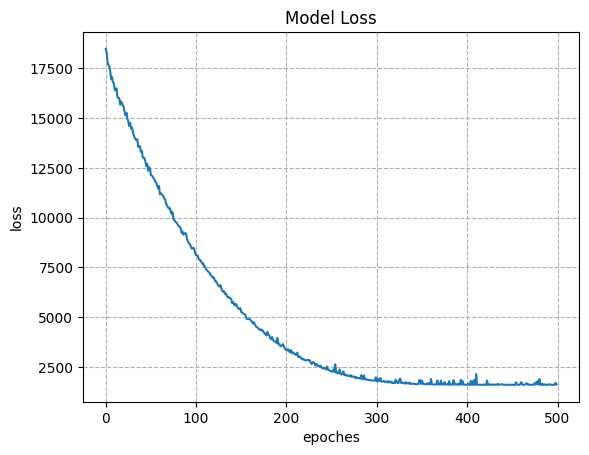

In [46]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

예측결과

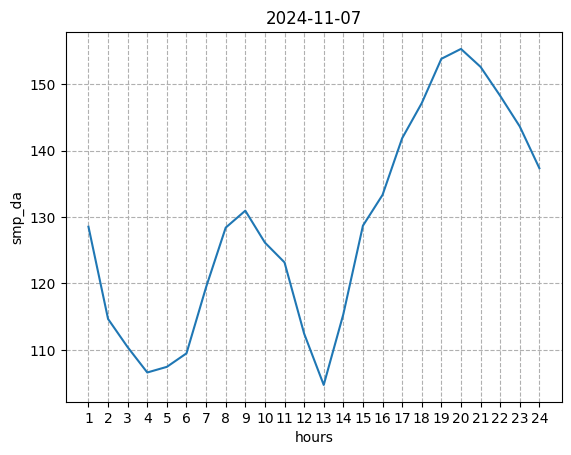

In [47]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(target_date['predict_target_date'])
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()